### Use pytorch to model class face recognition using the master_dataset.npz

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [10]:
# # Download training data from open datasets.
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # Download test data from open datasets.
# test_data = datasets.FashionMNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )# Download training data from open datasets.
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # Download test data from open datasets.
# test_data = datasets.FashionMNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )

In [5]:
datasetFileName = "D:/KOTOCLASS/secondmonth/cv-master/fiqPrj/master_dataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(423,)
(423,)
(423,)


In [6]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

object
int32
<U10
(423,)
(423,)
(423,)


In [10]:
dataLabels[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0])

In [11]:
dataLabelNames[0:10]

array(['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng',
       'mahmuda', 'numan', 'saseendran', 'afiq'], dtype='<U10')

In [17]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['afiq',
 'azureen',
 'gavin',
 'goke',
 'inamul',
 'jincheng',
 'mahmuda',
 'numan',
 'saseendran']

In [13]:
import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [14]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [15]:
# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.3, random_state=42)

print(trainImages.shape)
print(testImages.shape)

(296, 200, 200, 3)
(127, 200, 200, 3)


In [14]:
#len(training_data), len(test_data)

In [15]:
# classes = {
#     0: "T-Shirt",
#     1: "Trouser",
#     2: "Pullover",
#     3: "Dress",
#     4: "Coat",
#     5: "Sandal",
#     6: "Shirt",
#     7: "Sneaker",
#     8: "Bag",
#     9: "Ankle Boot",
# }

In [27]:
# X, y = training_data[0]
# print(X.shape)
# print(X.squeeze().shape)
# print(y)


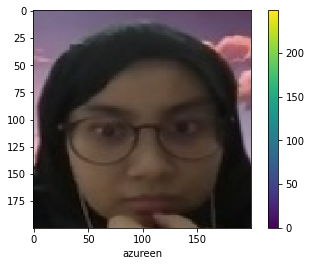

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [19]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0

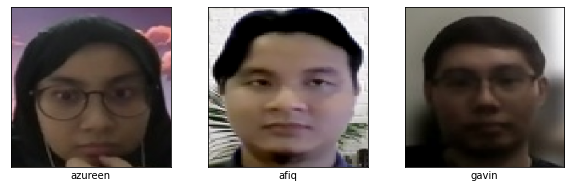

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [21]:
# import matplotlib.pyplot as plt

# img = X.squeeze()
# plt.imshow(img, cmap="gray")
# plt.title(f"{y}: {classes[y]}")
# plt.show()

In [22]:
# import matplotlib.pyplot as plt


# X, y = test_data[33]
# print(X.shape)
# print(X.squeeze().shape)
# print(y)

# img = X.squeeze()
# plt.imshow(img, cmap="gray")
# plt.title(f"{y}: {classes[y]}")
# plt.show()

### Dataloader

In [23]:
batch_size = 8

# Create data loaders.
train_dataloader = DataLoader(trainImages, batch_size=batch_size)
test_dataloader = DataLoader(testImages, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

ValueError: too many values to unpack (expected 2)

### Create Model

In [20]:
import torch

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Model Parameter

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Train

In [26]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.644169  [    0/60000]
loss: 0.744840  [ 6400/60000]
loss: 0.519461  [12800/60000]
loss: 0.743846  [19200/60000]
loss: 0.678126  [25600/60000]
loss: 0.634719  [32000/60000]
loss: 0.720870  [38400/60000]
loss: 0.713665  [44800/60000]
loss: 0.710067  [51200/60000]
loss: 0.685298  [57600/60000]
Test Error: 
 Accuracy: 76.2%, Avg loss: 0.673025 

Epoch 2
-------------------------------
loss: 0.622802  [    0/60000]
loss: 0.725915  [ 6400/60000]
loss: 0.503372  [12800/60000]
loss: 0.730860  [19200/60000]
loss: 0.666957  [25600/60000]
loss: 0.623365  [32000/60000]
loss: 0.702765  [38400/60000]
loss: 0.703467  [44800/60000]
loss: 0.698522  [51200/60000]
loss: 0.671934  [57600/60000]
Test Error: 
 Accuracy: 76.8%, Avg loss: 0.659340 

Epoch 3
-------------------------------
loss: 0.603467  [    0/60000]
loss: 0.708567  [ 6400/60000]
loss: 0.488892  [12800/60000]
loss: 0.719073  [19200/60000]
loss: 0.656982  [25600/60000]
loss: 0.613407  [32000/600

### Save Model

In [48]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Load Model

In [55]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [67]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0).item()], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle Boot", Actual: "Ankle Boot"
